# Climate coding challenge, Part 6

Getting your own data

## There are more Earth Observation data online than any one person could ever look at

[NASA’s Earth Observing System Data and Information System (EOSDIS)
alone manages over 9PB of
data](https://www.earthdata.nasa.gov/learn/articles/getting-petabytes-people-how-eosdis-facilitates-earth-observing-data-discovery-and-use).
1 PB is roughly 100 times the entire Library of Congress (a good
approximation of all the books available in the US). It’s all available
to **you** once you learn how to download what you want.

Here we’re using the NOAA National Centers for Environmental Information
(NCEI) [Access Data
Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
application progamming interface (API) to request data from their web
servers. We will be using data collected as part of the Global
Historical Climatology Network daily (GHCNd) from their [Climate Data
Online library](https://www.ncdc.noaa.gov/cdo-web/datasets) program at
NOAA.

For this example we’re requesting [daily summary data in
**Boulder, CO** (station ID
**USC00050848**)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00050848/detail).

> ** Your task:**
>
> 1.  Research the [**Global Historical Climatology Network -
>     Daily**](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)
>     data source.
> 2.  In the cell below, write a 2-3 sentence description of the data
>     source.
> 3.  Include a citation of the data (**HINT:** See the ‘Data Citation’
>     tab on the GHCNd overview page).
>
> Your description should include:
>
> -   who takes the data
> -   where the data were taken
> -   what the maximum temperature units are
> -   how the data are collected

**YOUR DATA DESCRIPTION AND CITATION HERE** 🛎️

* The Global Historical Climatology Network daily data integrates data from 30 different sources
* Observations are from a variety of meteorological organizations using land-based stations around the globe.
* Temperatures can be displayed in degrees Fahrenheit, but are collected in degrees Celsius
* There are three steps used to integrate data from different countries. Some locations contain historic data only and a quality assurance protocol is used although the data is not homogenous.

# Sources:
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Coweeta Hydrologic Station USC00312102. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ Accessed: Nov. 18, 2024.
* Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.
* https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt


## Access NCEI GHCNd Data from the internet using its API 🖥️ 📡 🖥️

The cell below contains the URL for the data you will use in this part
of the notebook. We created this URL by generating what is called an
**API endpoint** using the NCEI [API
documentation](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation).

> **Note**
>
> An **application programming interface** (API) is a way for two or
> more computer programs or components to communicate with each other.
> It is a type of software interface, offering a service to other pieces
> of software ([Wikipedia](https://en.wikipedia.org/wiki/API)).

First things first – you will need to import the `pandas` library to
access NCEI data through its URL:

In [1]:
# Import required packages
import pandas as pd

> **Your task:**
>
> 1.  Pick an expressive variable name for the URL.
> 2.  Reformat the URL so that it adheres to the [79-character PEP-8
>     line
>     limit](https://peps.python.org/pep-0008/#maximum-line-length). You
>     should see two vertical lines in each cell - don’t let your code
>     go past the second line.
> 3.  At the end of the cell where you define your url variable, **call
>     your variable (type out its name)** so it can be tested.

In [11]:
GHCnd_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
'?dataset=daily-summaries'
'&dataTypes=TOBS,PRCP'
'&stations=USC00312102'
'&startDate=1942-12-01'
'&endDate=2024-09-30'
'&units=standard'
)
GHCnd_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP&stations=USC00312102&startDate=1942-12-01&endDate=2024-09-30&units=standard'

------------------------------------------------------------------------

## **Download and get started working with NCEI data**

Just like you did with the practice data, go ahead and use pandas to
import data from your API URL into Python. If you didn’t do it already,
you should import the pandas library **at the top of this notebook** so
that others who want to use your code can find it easily.

In [12]:
# Import data into Python from NCEI API
nc_climate_df = pd.read_csv(GHCnd_url)

nc_climate_df

,STATION,DATE,PRCP,TOBS
0,USC00312102,1942-12-01,0.93,95.0
1,USC00312102,1942-12-02,0.05,31.0
2,USC00312102,1942-12-03,0.44,41.0
3,USC00312102,1942-12-04,0.00,25.0
4,USC00312102,1942-12-05,0.63,37.0
...,...,...,...,...
29884,USC00312102,2024-09-26,3.48,63.0
29885,USC00312102,2024-09-27,5.61,70.0
29886,USC00312102,2024-09-28,0.60,61.0
29887,USC00312102,2024-09-29,0.27,61.0


In [14]:
nc_climate_df = nc_climate_df.rename(columns={
    'TOBS': 'temp_f',
    'PRCP': 'precip_in'
})
nc_climate_df

,STATION,DATE,precip_in,temp_f
0,USC00312102,1942-12-01,0.93,95.0
1,USC00312102,1942-12-02,0.05,31.0
2,USC00312102,1942-12-03,0.44,41.0
3,USC00312102,1942-12-04,0.00,25.0
4,USC00312102,1942-12-05,0.63,37.0
...,...,...,...,...
29884,USC00312102,2024-09-26,3.48,63.0
29885,USC00312102,2024-09-27,5.61,70.0
29886,USC00312102,2024-09-28,0.60,61.0
29887,USC00312102,2024-09-29,0.27,61.0


In [16]:
nc_climate_df['temp_c'] = (nc_climate_df['temp_f'] - 32) * 5 / 9

nc_climate_df

,STATION,DATE,precip_in,temp_f,temp_c
0,USC00312102,1942-12-01,0.93,95.0,35.000000
1,USC00312102,1942-12-02,0.05,31.0,-0.555556
2,USC00312102,1942-12-03,0.44,41.0,5.000000
3,USC00312102,1942-12-04,0.00,25.0,-3.888889
4,USC00312102,1942-12-05,0.63,37.0,2.777778
...,...,...,...,...,...
29884,USC00312102,2024-09-26,3.48,63.0,17.222222
29885,USC00312102,2024-09-27,5.61,70.0,21.111111
29886,USC00312102,2024-09-28,0.60,61.0,16.111111
29887,USC00312102,2024-09-29,0.27,61.0,16.111111


In [17]:
import holoviews as hv
import hvplot.pandas

<Axes: >

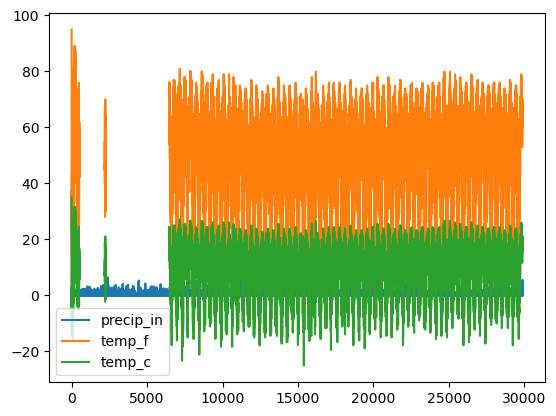

In [18]:
nc_climate_df.plot()